In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv("Jamboree_Admission.csv")

In [40]:
df.shape

(500, 9)

In [41]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [43]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [44]:
df.isnull().sum()/len(df)*100

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [45]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [46]:
df["Chance of Admit "].value_counts(normalize=True)

Chance of Admit 
0.71    0.046
0.64    0.038
0.73    0.036
0.72    0.032
0.79    0.032
        ...  
0.38    0.004
0.36    0.004
0.43    0.002
0.39    0.002
0.37    0.002
Name: proportion, Length: 61, dtype: float64

In [47]:
df["Chance of Admit "].nunique()

61

In [48]:
# drop unreleavent columns
df =df.drop(["Serial No."], axis=1)


In [49]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [50]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

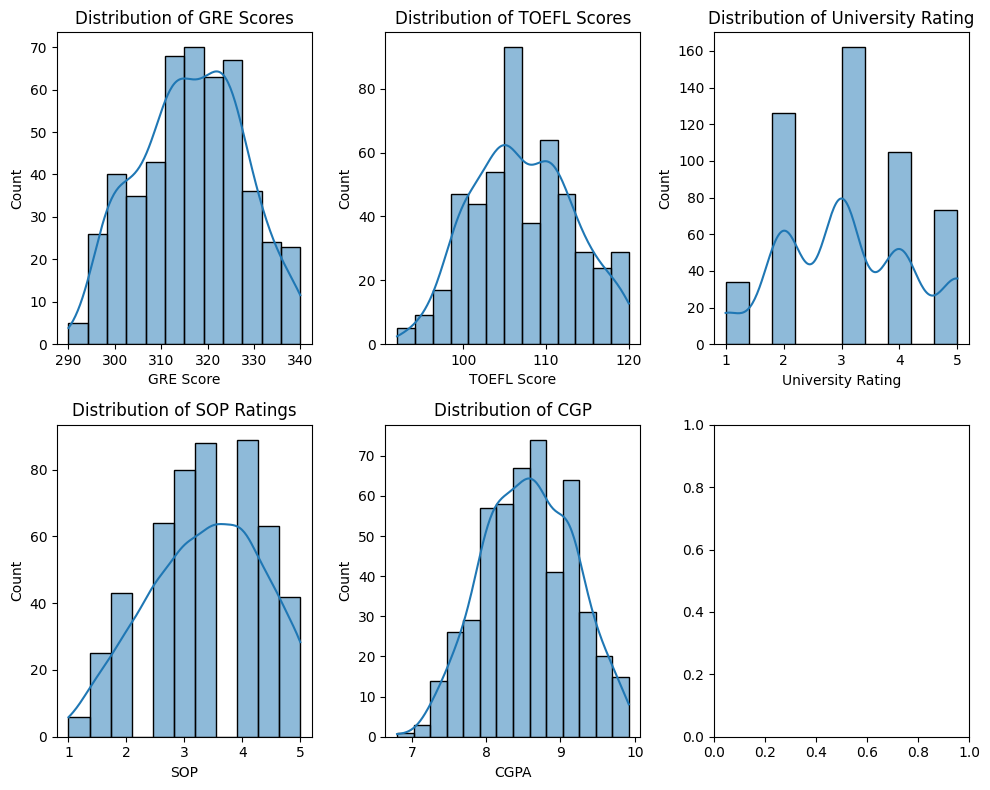

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# Plot on the first subplot
sns.histplot(df['GRE Score'], kde=True,ax=axes[0][0])
axes[0][0].set_title('Distribution of GRE Scores')

# Plot on the second subplot
sns.histplot(df['TOEFL Score'], kde=True,ax=axes[0][1])
axes[0][1].set_title('Distribution of TOEFL Scores')

# Plot on the third subplot
sns.histplot(df['University Rating'], kde=True,ax=axes[0][2])
axes[0][2].set_title('Distribution of University Rating')



# Plot on the third subplot
sns.histplot(df['SOP'], kde=True,ax=axes[1][0])
axes[1][0].set_title('Distribution of SOP Ratings')


# Plot on the third subplot
sns.histplot(df['CGPA'], kde=True,ax=axes[1][1])
axes[1][1].set_title('Distribution of CGP')
plt.tight_layout()
plt.show()



### It is clear from the distributions, students with varied merit apply for the university.
- Understanding the relation between different factors responsible for graduate admissions

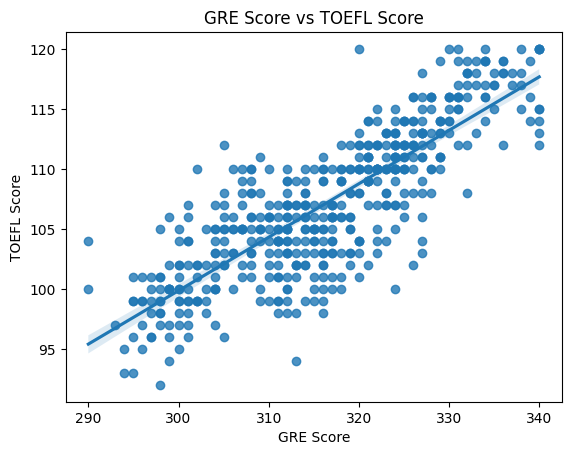

In [52]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable


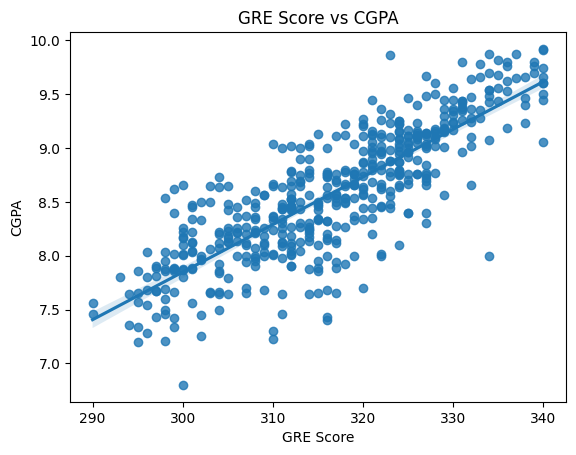

In [53]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores
maybe because they are smart or hard working

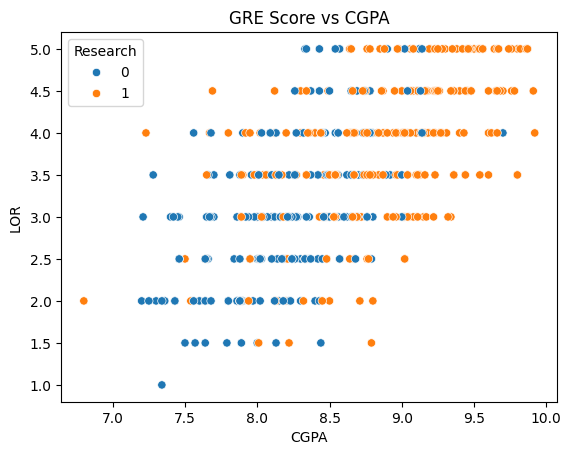

In [54]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on
that persons academic excellence. Having research experience is usually related with a
good LOR which might be justified by the fact that supervisors have personal interaction
with the students performing research which usually results in good LORs


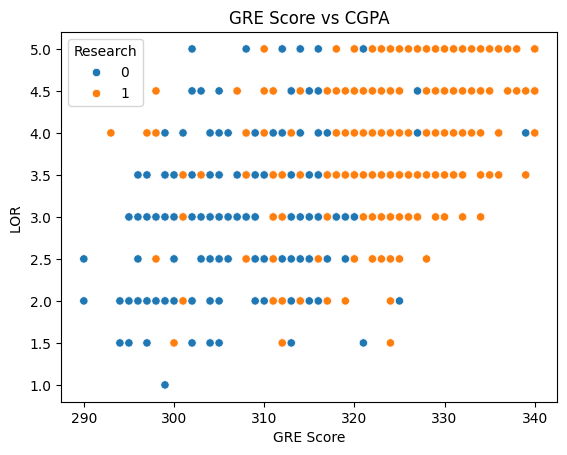

In [55]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

GRE scores and LORs are also not that related. People with different kinds of LORs have all
kinds of GRE scores


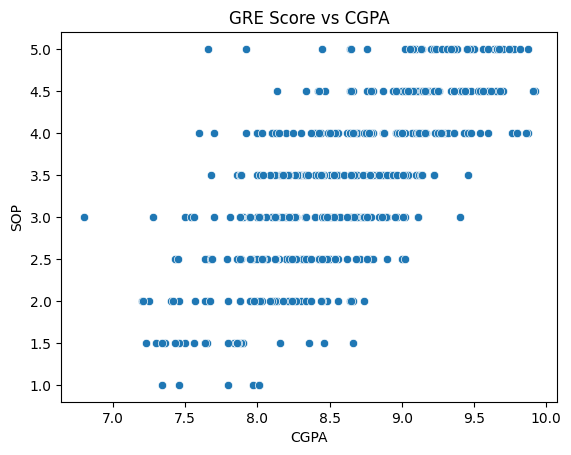

In [56]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()


CGPA and SOP are not that related because Statement of Purpose is related to academic
performance, but since people with good CGPA tend to be more hard working so they have
good things to say in their SOP which might explain the slight move towards higher CGPA
as along with good SOPs


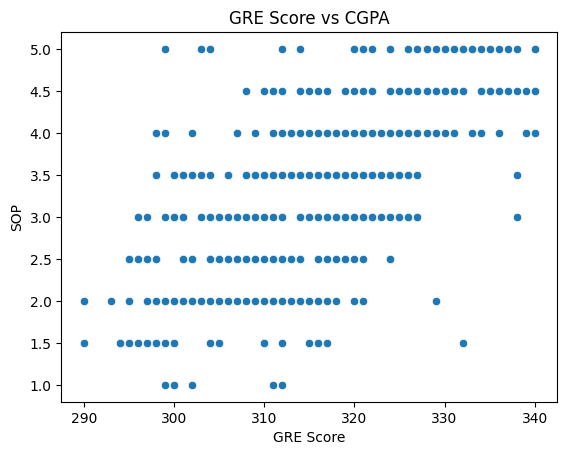

In [57]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Similary, GRE Score and CGPA is only slightly related

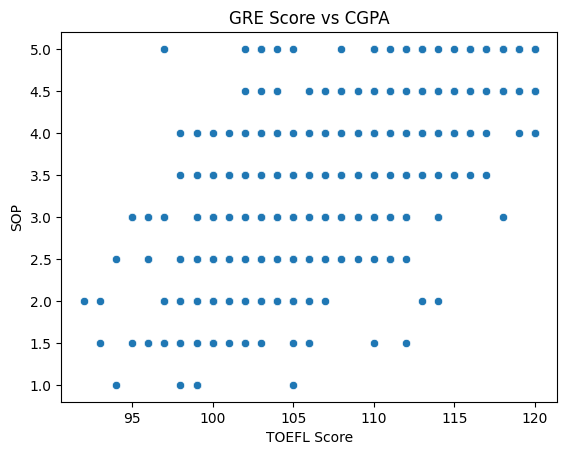

In [58]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of
SOP is not always related to the applicants English skills.

## Correlation among variables


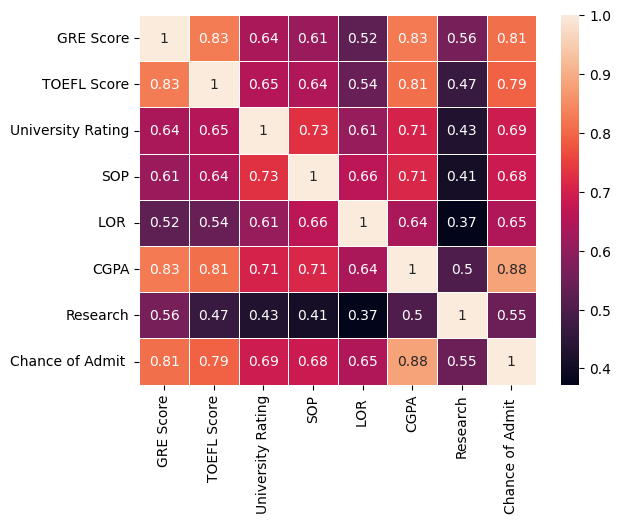

In [59]:
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()

Lets split the dataset with training and testing set and prepare the inputs and outputs


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
df.head(1)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [62]:
y = df["Chance of Admit "]
x = df.drop("Chance of Admit ",axis=1)

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,shuffle=True)

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scale = StandardScaler()
x_train_sc = scale.fit_transform(x_train)
x_test_sc = scale.transform(x_test)

In [66]:
x_train_sc = pd.DataFrame(x_train_sc,columns=x.columns)

In [67]:
x_test_sc = pd.DataFrame(x_test_sc,columns=x.columns)

Lets use a bunch of different algorithms to see which model performs better

In [68]:
x_train_sc.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.831017,-1.606603,0.669456,-0.342343,0.884314,-0.402990,-1.151339
1,-1.230544,-0.375490,-0.127515,0.120283,-0.606103,-0.551640,-1.151339
2,-1.390355,-1.298824,-0.924486,-1.730221,-1.102909,-1.532730,0.868554
3,0.687187,0.547845,-0.127515,0.120283,-0.109297,0.756480,0.868554
4,0.447471,0.701734,0.669456,0.582909,0.387509,0.652425,0.868554


In [69]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
# Ridge (L2 Norm) follow equlidean distance
# Lasso (L1 Norm) follow menhatten distance

In [70]:
models = [
 ['Linear Regression :', LinearRegression()],

 ['Lasso Regression :', Lasso(alpha=0.1)], #try with differen
 ['Ridge Regression :', Ridge(alpha=1.0)] #try with different
 ]
print("Results without removing features with multicollinearity ...")
for name,model in models:
 model.fit(x_train_sc, y_train.values)
 predictions = model.predict(x_test_sc)
 print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results without removing features with multicollinearity ...
Linear Regression : 0.062267965441371365
Lasso Regression : 0.11086498631558961
Ridge Regression : 0.06223620929537702


### Linear Regression using Statsmodel library
- Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
- const coefficient is your Y-intercept. It means that if both the Interest_Rate and Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would
be equal to the const coefficient.
- Interest_Rate coefficient represents the change in the output Y due to a change of one
unit in the interest rate (everything else held constant)
- Unemployment_Rate coefficient represents the change in the output Y due to a change
of one unit in the unemployment rate (everything else held constant)
- std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
 - P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
- Confidence Interval represents the range in which our coefficients are likely to fall (with a
likelihood of 95%)


In [71]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train_sc)
model = sm.OLS(y_train.values, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     101.5
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           1.86e-40
Time:                        03:27:24   Log-Likelihood:                 155.81
No. Observations:                 100   AIC:                            -295.6
Df Residuals:                      92   BIC:                            -274.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7206      0.00

In [72]:
x_train_new=x_train.drop(columns='University Rating')

In [73]:
model1 = sm.OLS(y_train.values, x_train_new).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     119.6
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           1.71e-41
Time:                        03:27:25   Log-Likelihood:                 155.76
No. Observations:                 100   AIC:                            -297.5
Df Residuals:                      93   BIC:                            -279.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7206      0.005    136.343      

### VIF(Variance Inflation Factor)
VIF score of an independent variable represents how well the variable is explained by
other independent variables.
So, the closer the R^2 value to 1, the higher the value of VIF and the higher the
multicollinearity with the particular independent variable

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataset,col):
 dataset=dataset.drop(columns=col,axis=1)
 vif=pd.DataFrame()
 vif['features']=dataset.columns
 # print(vif['features'].tolist())
 vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(len(vif['features'].tolist()))]
 return vif


In [75]:
calculate_vif(x_train_new,[])


,features,VIF_Value
0,const,1.000000
1,GRE Score,5.302396
2,TOEFL Score,4.511055
3,SOP,3.259483
4,LOR,2.515761
5,CGPA,5.989319
6,Research,1.499422


## VIF looks fine and hence, we can go ahead with the predictions

In [76]:
x_test = sm.add_constant(x_test)

In [77]:
x_test_del=list(set(x_test.columns).difference(set(x_train_new.columns)))

In [78]:
print(f'Dropping {x_test_del} from test set')

Dropping ['University Rating'] from test set


In [79]:
x_test_new=x_test.drop(columns=x_test_del)

In [80]:
#Prediction from the clean model
pred = model1.predict(x_test_new)

print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred))
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred)))


Mean Absolute Error  8.785203619591396
Root Mean Square Error  8.789476582243788


## Mean of Residuals

In [81]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))


Mean of Residuals -8.785203619591396


## Test for Homoscedasticity

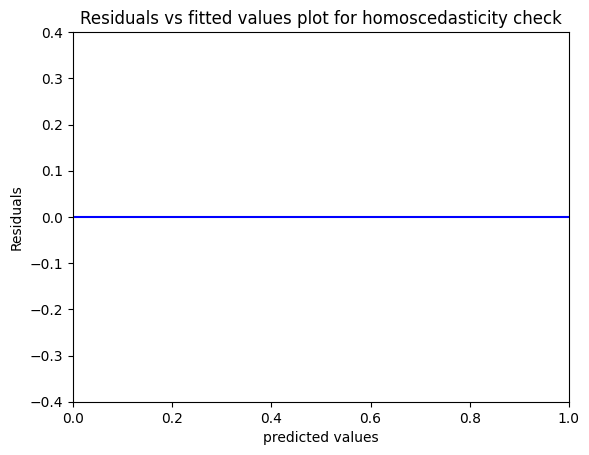

In [153]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [155]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_test)
lzip(name, test)

[('F statistic', 1.0375505020382663), ('p-value', 0.399341318990338)]

##### Here null hypothesis is - error terms are homoscedastic and since p-values >0.05, we fail to reject the null hypothesis


## Normality of residuals

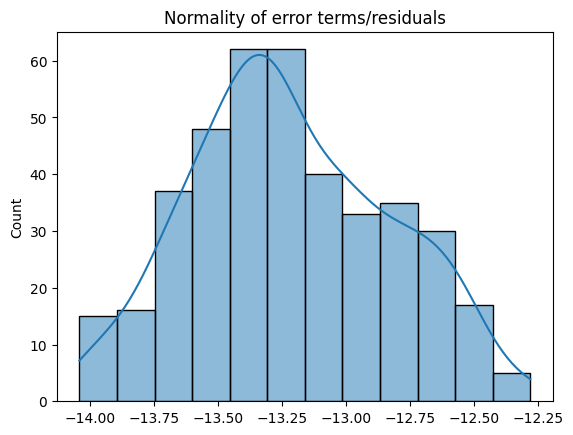

In [158]:
p = sns.histplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.show()

Text(0, 0.5, 'y_pred')

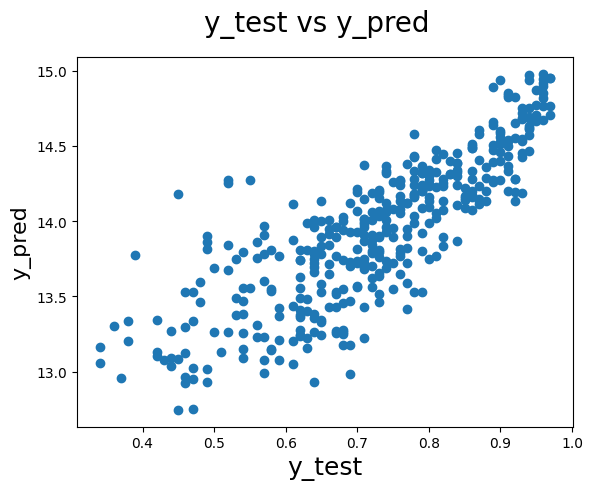

In [159]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20) # Plot head
plt.xlabel('y_test', fontsize=18) # X-label
plt.ylabel('y_pred', fontsize=16)

## Bias-Variance Tradeoff
- Bias is as a result of over simplified model assumptions
- Variance occurs when the assumptions are too complex
- The more preferred model is one with low bias and low varinace.
- Dimensionality reduction and feature selection can decrease variance by simplifying
models.
- Similarly, a larger training set tends to decrease variance.
- For reducing Bias: Change the model, Ensure the date is truly representative(Ensure that
the training data is diverse and represents all possible groups or outcomes.), Parameter
tuning.
- The bias–variance decomposition forms the conceptual basis for regression
regularization methods such as Lasso and ridge regression.
- Regularization methods introduce bias into the regression solution that can reduce
variance considerably relative to the ordinary least squares (OLS) solution.
- Although the OLS solution provides non-biased regression estimates, the lower variance
solutions produced by regularization techniques provide superior MSE performance.
- Linear and Generalized linear models can be regularized to decrease their variance at
the cost of increasing their bias.

In [1]:
s = {"a","b","c"}
type(s)

set

In [3]:
t=(2,3,4)
type(t)

tuple

In [4]:
t[1] = 7

TypeError: 'tuple' object does not support item assignment

In [5]:
d = {"a":1,"b":3}
d["a"]=5

In [6]:
d

{'a': 5, 'b': 3}

In [16]:
sr = " ffsi  a  "
for i in sr:
    

7

['ffsi', 'a']